In [ ]:
'''
"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."
'''

'\n"I (We) certify that the code and data in this assignment were generated independently,\nusing only the tools and resources defined in the course and that I (we) did not receive\nany external help, coaching or contributions during the production of this work."\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
!pwd  #Present Working Director


/content


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:

%cd ..
%cd /content/drive/MyDrive



/
/content/drive/MyDrive


In [ ]:
df=pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
df.shape

(344, 8)

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
df.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [ ]:

n_species=(df['species'].value_counts())
print(n_species)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


In [ ]:
n_islands=df['island'].value_counts()
print(n_islands)

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


# The feilds species, islands and sex need to be mapped to numeric values
## We use 0 for female and 1 for male
## we use 1 for the species Adelie, 2 for the species Gentoo and 3 for the species Chinstrap
## We use 1 for Biscoe 2 for Dream and 3 for Torgersen



In [ ]:
df['sex'].replace(['female','male'],[0,1],inplace=True)
df['species'].replace(['Adeloe','Gento','chinstrap'],[1,2,3],inplace=True)
df['island'].replace(['Biscoe','Dream','Torgersen'],[1,2,3],inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,3,39.1,18.7,181.0,3750.0,1.0,2007
1,Adelie,3,39.5,17.4,186.0,3800.0,0.0,2007
2,Adelie,3,40.3,18.0,195.0,3250.0,0.0,2007
3,Adelie,3,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,3,36.7,19.3,193.0,3450.0,0.0,2007


In [ ]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,2,55.8,19.8,207.0,4000.0,1.0,2009
340,Chinstrap,2,43.5,18.1,202.0,3400.0,0.0,2009
341,Chinstrap,2,49.6,18.2,193.0,3775.0,1.0,2009
342,Chinstrap,2,50.8,19.0,210.0,4100.0,1.0,2009
343,Chinstrap,2,50.2,18.7,198.0,3775.0,0.0,2009


In [ ]:
df.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,333.000000,344.000000
mean,1.662791,43.921930,17.151170,200.915205,4201.754386,0.504505,2008.029070
std,0.726194,5.459584,1.974793,14.061714,801.954536,0.500732,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,1.000000,39.225000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,2.000000,44.450000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,2.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2009.000000
max,3.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


# Data Cleaning
## Removing nan not a number values

In [ ]:
print(df.isnull().values.any())
print("Total count of all null values",df.isnull().sum().sum())


True
Total count of all null values 19


In [ ]:
df=df.dropna()

In [ ]:
print(df.isnull().values.any())
print("Total count of all null values",df.isnull().sum().sum())

False
Total count of all null values 0


Normalize non-categorical features 

In [ ]:
def normalize(feature):
  mx=df[feature].max()
  mi=df[feature].min()


  df[feature]=(df[feature]-mi)/(mx-mi)
  print("Maximum Value of",feature,mx,"Minimum Value of ",feature,mi)


In [ ]:
normalize('bill_length_mm')
normalize('bill_depth_mm')
normalize('flipper_length_mm')
normalize('body_mass_g')


Maximum Value of bill_length_mm 59.6 Minimum Value of  bill_length_mm 32.1
Maximum Value of bill_depth_mm 21.5 Minimum Value of  bill_depth_mm 13.1
Maximum Value of flipper_length_mm 231.0 Minimum Value of  flipper_length_mm 172.0
Maximum Value of body_mass_g 6300.0 Minimum Value of  body_mass_g 2700.0


In [ ]:
df.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.651652,0.432465,0.483912,0.490966,0.418627,0.504505,2008.042042
std,0.714715,0.198861,0.234433,0.237555,0.223671,0.500732,0.812944
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
25%,1.000000,0.269091,0.297619,0.305085,0.236111,0.000000,2007.000000
50%,2.000000,0.450909,0.500000,0.423729,0.375000,1.000000,2008.000000
75%,2.000000,0.600000,0.666667,0.694915,0.576389,1.000000,2009.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2009.000000


## Target Variable Y is sex 0 or 1 i.e female or male
## Input features bill_length_mm,	bill_depth_mm, flipper_length_mm, body_mass_g

In [ ]:
#Output  N x 1 dim
Y=df['sex']
print(Y)
print(Y.shape)

0      1.0
1      0.0
2      0.0
4      0.0
5      1.0
      ... 
339    1.0
340    0.0
341    1.0
342    1.0
343    0.0
Name: sex, Length: 333, dtype: float64
(333,)


In [ ]:
#Input  N x 4 dim

X = pd.concat([df['bill_length_mm'], df['bill_depth_mm'],df['flipper_length_mm'],df['body_mass_g']], axis = 1)
print(X)


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          0.254545       0.666667           0.152542     0.291667
1          0.269091       0.511905           0.237288     0.305556
2          0.298182       0.583333           0.389831     0.152778
4          0.167273       0.738095           0.355932     0.208333
5          0.261818       0.892857           0.305085     0.263889
..              ...            ...                ...          ...
339        0.861818       0.797619           0.593220     0.361111
340        0.414545       0.595238           0.508475     0.194444
341        0.636364       0.607143           0.355932     0.298611
342        0.680000       0.702381           0.644068     0.388889
343        0.658182       0.666667           0.440678     0.298611

[333 rows x 4 columns]


# Now we have to traing to find the weight vector W which tells us how much does each of the 4 feature contrubute to your prediction

## y_predict = sigmoid(W^T.X + b)
 

In [ ]:
#We shuffle our dataframe and then select the first 80% as train and last 20% as test
shuffled_df=df.sample(frac=1)
shuffled_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
46,Adelie,2,0.327273,0.702381,0.169492,0.201389,1.0,2007
96,Adelie,2,0.218182,0.654762,0.305085,0.277778,0.0,2008
138,Adelie,2,0.178182,0.404762,0.220339,0.194444,0.0,2009
167,Gentoo,1,0.625455,0.309524,0.762712,0.875000,1.0,2007
323,Chinstrap,2,0.614545,0.773810,0.677966,0.444444,1.0,2009


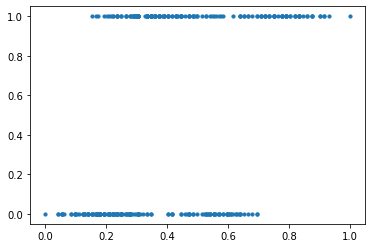

In [ ]:
plt.scatter(df['body_mass_g'],df['sex'],s=10)
plt.show()

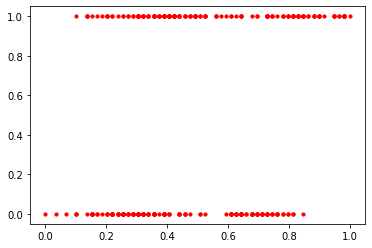

In [ ]:
plt.scatter(df['flipper_length_mm'],df['sex'],color='red',s=10)
plt.show()

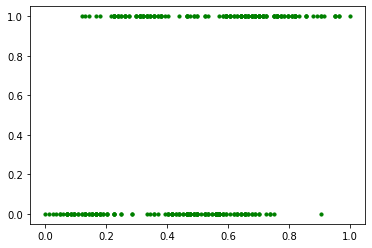

In [ ]:
plt.scatter(df['bill_depth_mm'],df['sex'],color='green',s=10)
plt.show()

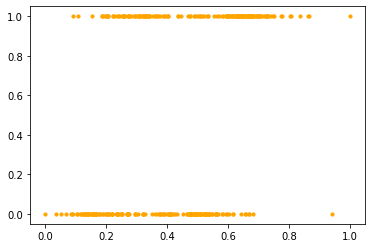

In [ ]:
plt.scatter(df['bill_length_mm'],df['sex'],color='orange',s=10)
plt.show()

# From the above visualization bodymass and bill length seem important features to pick for logistic regression

In [ ]:
training_size= int(len(shuffled_df)*0.8)
train_df=shuffled_df[:training_size]
test_df=shuffled_df[training_size:]


X_train= pd.concat([train_df['bill_length_mm'],train_df['body_mass_g'],train_df['bill_depth_mm'],train_df['bill_depth_mm']], axis = 1)
Y_train=train_df['sex']

x_test=pd.concat([test_df['bill_length_mm'],test_df['body_mass_g'],test_df['bill_depth_mm'],test_df['bill_depth_mm']], axis = 1)
y_test=test_df['sex']

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(266, 4)
(266,)
(67, 4)
(67,)


In [ ]:
print(x_test)
print(y_test)


     bill_length_mm  body_mass_g  bill_depth_mm  bill_depth_mm
183        0.389091     0.555556       0.130952       0.130952
135        0.327273     0.333333       0.523810       0.523810
1          0.269091     0.305556       0.511905       0.511905
224        0.585455     0.666667       0.297619       0.297619
65         0.345455     0.347222       0.583333       0.583333
..              ...          ...            ...            ...
187        0.592727     0.750000       0.380952       0.380952
222        0.567273     0.569444       0.226190       0.226190
147        0.163636     0.215278       0.630952       0.630952
104        0.210909     0.062500       0.654762       0.654762
236        0.465455     0.569444       0.083333       0.083333

[67 rows x 4 columns]
183    0.0
135    1.0
1      0.0
224    1.0
65     1.0
      ... 
187    1.0
222    0.0
147    0.0
104    0.0
236    0.0
Name: sex, Length: 67, dtype: float64


In [ ]:

class LogitRegression():

  def __init__(self,alpha,n,X_train,Y_train,x_test,y_test) -> None:
      self.learning_rate=alpha
      self.iter=n
      self.predictions=[]
      self.loss_itr=[]
      self.X_train=X_train
      self.Y_train=Y_train
      self.x_test=x_test
      self.y_test=y_test
      

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def cost(self, p, y):
    return np.mean(-y.T * np.log(p) - (1 - y.T) * np.log(1 - p))

  def fit(self):

    m,n=self.X_train.shape
    self.weights=np.zeros(n)
    
    print("Initial random weights",self.weights)
    #self.weights=np.zeros(n)
    self.bias=0

    for i in range(self.iter):

      s=self.sigmoid(np.dot(self.weights,self.X_train.T))+self.bias

      delta=self.cost(s,self.Y_train)

      self.loss_itr.append(delta)

      dw=(1/m)*(np.dot(self.X_train.T,(s-self.Y_train)))
      db = (1/m)*np.sum((s - Y_train)) 
      

      self.weights-=self.learning_rate*dw
      self.bias-=self.learning_rate*db

  def predict(self):
    
      print(self.weights)
      print(self.x_test)
      s=self.sigmoid(np.dot(self.weights,x_test.T))+self.bias
      print("shape of sigmoid output",s.shape)
      print("predictions",s)
      
      for i in s:
        if i>=0.5:
          self.predictions.append(1)
        else: 
          self.predictions.append(0)

      
      y_test=list(self.y_test)
      count=0
      #print("predicted vlassification",self.predictions)


      for i in range(len(model.predictions)):
        if self.predictions[i]==y_test[i]:
          count+=1
      print(count/len(y_test))
  

model=LogitRegression(0.0001,100000,X_train,Y_train,x_test,y_test)
model.fit()

print("Weights after training ",model.weights)

Initial random weights [0. 0. 0. 0.]
Weights after training  [0.29585341 0.45005679 0.34935934 0.34935934]


In [ ]:
model.predict()

[0.28498529 0.46680545 0.30475668 0.30475668]
     bill_length_mm  body_mass_g  bill_depth_mm  bill_depth_mm
204        0.472727     0.472222       0.154762       0.154762
70         0.050909     0.250000       0.702381       0.702381
279        0.483636     0.229167       0.666667       0.666667
332        0.476364     0.152778       0.416667       0.416667
310        0.640000     0.250000       0.654762       0.654762
..              ...          ...            ...            ...
220        0.414545     0.555556       0.130952       0.130952
278        0.698182     0.263889       0.726190       0.726190
294        0.520000     0.208333       0.654762       0.654762
168        0.360000     0.402778       0.047619       0.047619
173        0.472727     0.638889       0.166667       0.166667

[67 rows x 4 columns]
shape of sigmoid output (67,)
predictions [0.48924148 0.51501979 0.53599359 0.49198493 0.54650824 0.49756442
 0.54773233 0.55658491 0.47422854 0.46399763 0.54786655 0.52781315

In [ ]:
print(model.predictions)

[0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]


[0.28498529 0.46680545 0.30475668 0.30475668]


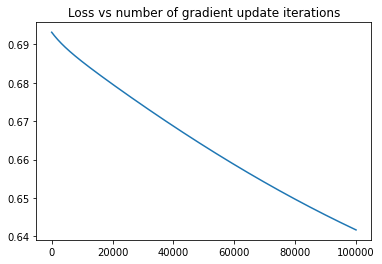

In [ ]:
print(model.weights)
plt.plot(model.loss_itr)
plt.title("Loss vs number of gradient update iterations")
plt.show()

In [ ]:
count=0
res=model.predictions
for i in range(len(model.predictions)):

  if model.predictions[i]==list(y_test)[i]:
    count+=1
print("Accuracy is",100*(count)/len(model.predictions))

Accuracy is 73.13432835820896


# Changing Hyperparameters

Initial random weights [0. 0. 0. 0.]
[0.29585471 0.45005798 0.34936119 0.34936119]
     bill_length_mm  body_mass_g  bill_depth_mm  bill_depth_mm
183        0.389091     0.555556       0.130952       0.130952
135        0.327273     0.333333       0.523810       0.523810
1          0.269091     0.305556       0.511905       0.511905
224        0.585455     0.666667       0.297619       0.297619
65         0.345455     0.347222       0.583333       0.583333
..              ...          ...            ...            ...
187        0.592727     0.750000       0.380952       0.380952
222        0.567273     0.569444       0.226190       0.226190
147        0.163636     0.215278       0.630952       0.630952
104        0.210909     0.062500       0.654762       0.654762
236        0.465455     0.569444       0.083333       0.083333

[67 rows x 4 columns]
shape of sigmoid output (67,)
predictions [0.47323863 0.50960924 0.50089248 0.52502717 0.52164136 0.51364356
 0.56428336 0.55217799 0.5366

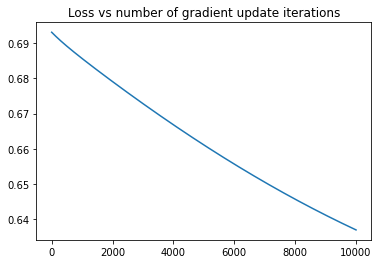

Accuracy is 76.11940298507463


In [ ]:
#Increasing the learning rate and reducing the number of iterations
model=LogitRegression(0.001,10000,X_train,Y_train,x_test,y_test)
model.fit()
model.predict()
#print(model.weights)
plt.plot(model.loss_itr)
plt.title("Loss vs number of gradient update iterations")
plt.show()
count=0
res=model.predictions
for i in range(len(model.predictions)):

  if model.predictions[i]==list(y_test)[i]:
    count+=1
print("Accuracy is",100*(count)/len(model.predictions))

Initial random weights [0. 0. 0. 0.]
[3.24014569 4.77166589 3.80494387 3.80494387]
     bill_length_mm  body_mass_g  bill_depth_mm  bill_depth_mm
183        0.389091     0.555556       0.130952       0.130952
135        0.327273     0.333333       0.523810       0.523810
1          0.269091     0.305556       0.511905       0.511905
224        0.585455     0.666667       0.297619       0.297619
65         0.345455     0.347222       0.583333       0.583333
..              ...          ...            ...            ...
187        0.592727     0.750000       0.380952       0.380952
222        0.567273     0.569444       0.226190       0.226190
147        0.163636     0.215278       0.630952       0.630952
104        0.210909     0.062500       0.654762       0.654762
236        0.465455     0.569444       0.083333       0.083333

[67 rows x 4 columns]
shape of sigmoid output (67,)
predictions [0.50008634 0.50610907 0.50544363 0.50677144 0.50668343 0.50629501
 0.50733203 0.50724793 0.5070

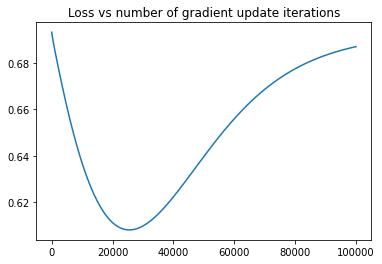

Accuracy is 55.223880597014926


In [ ]:
#Increasing the learning rate for same number of iteration
model=LogitRegression(0.001,100000,X_train,Y_train,x_test,y_test)
model.fit()
model.predict()
#print(model.weights)
plt.plot(model.loss_itr)
plt.title("Loss vs number of gradient update iterations")
plt.show()
count=0
res=model.predictions
for i in range(len(model.predictions)):

  if model.predictions[i]==list(y_test)[i]:
    count+=1
print("Accuracy is",100*(count)/len(model.predictions))

Initial random weights [0. 0. 0. 0.]
[0.00039022 0.00054079 0.0004657  0.0004657 ]
     bill_length_mm  body_mass_g  bill_depth_mm  bill_depth_mm
183        0.389091     0.555556       0.130952       0.130952
135        0.327273     0.333333       0.523810       0.523810
1          0.269091     0.305556       0.511905       0.511905
224        0.585455     0.666667       0.297619       0.297619
65         0.345455     0.347222       0.583333       0.583333
..              ...          ...            ...            ...
187        0.592727     0.750000       0.380952       0.380952
222        0.567273     0.569444       0.226190       0.226190
147        0.163636     0.215278       0.630952       0.630952
104        0.210909     0.062500       0.654762       0.654762
236        0.465455     0.569444       0.083333       0.083333

[67 rows x 4 columns]
shape of sigmoid output (67,)
predictions [0.50017992 0.50023532 0.50022311 0.5002529  0.50025283 0.5002358
 0.5003187  0.50029203 0.50027

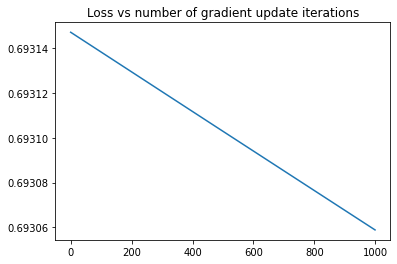

Accuracy is 50.74626865671642


In [ ]:
#Decreasing both the learning rate and number of iterations
model=LogitRegression(0.00001,1000,X_train,Y_train,x_test,y_test)
model.fit()
model.predict()
#print(model.weights)
plt.plot(model.loss_itr)
plt.title("Loss vs number of gradient update iterations")
plt.show()
count=0
res=model.predictions
for i in range(len(model.predictions)):

  if model.predictions[i]==list(y_test)[i]:
    count+=1
print("Accuracy is",100*(count)/len(model.predictions))

# Bonus Gradient Descent from Scratch

In [ ]:
training_size= int(len(shuffled_df)*0.8)
train_df=shuffled_df[:training_size]
test_df=shuffled_df[training_size:]

X_train= pd.concat([train_df['bill_length_mm'],train_df['bill_depth_mm'],train_df['flipper_length_mm']], axis = 1)
Y_train=train_df['body_mass_g']

x_test= pd.concat([test_df['bill_length_mm'],test_df['bill_depth_mm'],test_df['flipper_length_mm']],axis=1)
y_test=test_df['body_mass_g']

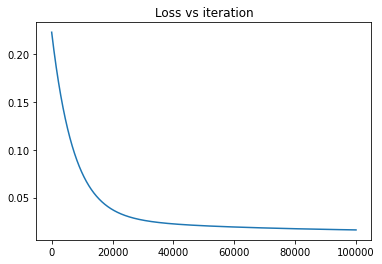

In [ ]:
class grad_decent():
  def __init__ (self,alpha,n,X_train,Y_train,x_test,y_test):

      self.learning_rate=alpha
      self.iter=n
      self.predictions=[]
      self.loss_itr=[]
      self.X_train=X_train
      self.Y_train=Y_train
      self.x_test=x_test
      self.y_test=y_test
      

  #For gradient descent we use Mean squared error loss

      m,n=X_train.shape
      self.weights= np.zeros(n)
      self.bias=0

      for i in range(self.iter):

        r=np.dot(self.weights,self.X_train.T)

        dw=(1/m)*(np.dot(self.X_train.T,(r-self.Y_train)))
        db = (1/m)*np.sum((r - Y_train)) 
      


        self.weights-=self.learning_rate*dw
        self.bias-=self.learning_rate*db
        

        loss=np.square(np.subtract(r, self.Y_train)).mean()
        self.loss_itr.append(loss)

      plt.plot(self.loss_itr)
      plt.title("Loss vs iteration")
      plt.show
      
model=grad_decent(0.0001,100000,X_train,Y_train,x_test,y_test)




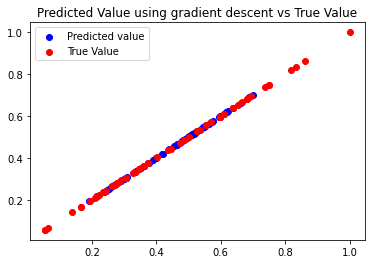

In [ ]:
prediction=np.dot(model.weights,x_test.T)

ax = plt.gca()

ax.scatter(prediction, prediction, color="b",label="Predicted value")
ax.scatter(y_test, y_test, color="r",label="True Value")
plt.legend()
plt.title("Predicted Value using gradient descent vs True Value")
plt.show()